From: A.K.

# Some optimization methods

1. Gradient descent method in Python

2. Implementation of the simulated annealing method in Python

3. Implementation of differential evolution algorithm in Python

4. Implementation of the Nelder-Mead method in Python

## 1. Gradient descent method in Python


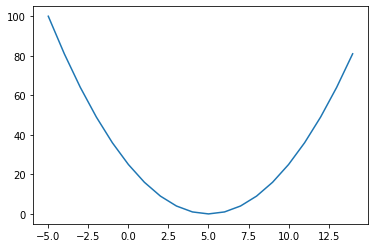

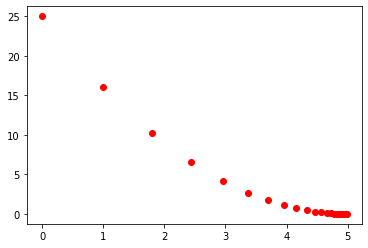

мин. Х = 4.981110534068522
мин. Y = 0.000356811923176468


In [1]:
from scipy.misc import derivative

%matplotlib inline
from matplotlib import pylab as plt
import scipy as sp
import numpy as np
import math
import scipy.optimize as opt

# define a function
def f(x):
    return (x-5)**2

# Checking to see if we can find f'(x)
derivative(f, 0)

# Draw the graph of the function
x = range(-5,15)
y = [f(xn) for xn in x]
plt.plot(x, y)
plt.show()

# preparation for gradient descent

# initial value
xn = 0 
yn = f(xn)

# create a dictionary where we will store all found function values
Y = {xn: yn}

# step
step = 0.1

# using the gradient descent formula we obtain all the values of x y
for _ in range(25):
    xn = xn - step*derivative(f, xn)
    yn = f(xn)
    Y[xn] = yn
    
# put the found points on the graph
plt.plot(list(Y.keys()), list(Y.values()), 'ro')
plt.show()

X = {}
for i in range(len(Y)):
    X[list(Y.values())[i]] = list(Y.keys())[i]

# display the pair of minimal X and Y (close to minima) we are looking for
print ('мин. Х =', min(X.items())[1])
print ('мин. Y =', min(X.items())[0])

## 2. Implementation of the simulated annealing method in Python

In [2]:
def Ef(x):
    return (x+5)**2

def Pf(_e_old, _e_new, _t):
    return 1. / (1 + math.exp((_e_new - _e_old) / max(0.1, _t)))

def anneal(E, s0, k_max, P):
    s = s0
    k = 0
    while k <= k_max:
        T = k / k_max
        s_new = s + 1
        e_old = E(s)
        e_new = E(s_new)
        if P(e_old, e_new, T) >= np.random.random():
            s = s_new
        k += 1

    return s

print(anneal(Ef, np.random.uniform(0, 25), 100, Pf))

22.24892873393609


## 3. Implementation of differential evolution algorithm in Python

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-5, 5), (-5, 5)]
opt.differential_evolution(ackley, bounds)

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3003
     nit: 97
 success: True
       x: array([0., 0.])

## 4. Implementation of the Nelder-Mead method in Python

In [4]:
def Rosenbrock(X):
    return (1.0 - X[0])**2 + 100.0_8 * (X[1] - X[0] * X[0] )**2

n = 2
x0 = np.zeros(2, dtype = float) # Vector with two elements of type float
# Initial point for finding the minimum of a function
x0[0] = -5.0
x0[1] = 10.0
xtol = 1.0e-5 # Accuracy of extremum search
# Find the minimum of the function
res = opt.minimize(Rosenbrock, x0, method = 'Nelder-Mead', options = {'xtol': xtol, 'disp': True})
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 143
         Function evaluations: 269
 final_simplex: (array([[1.00000132, 1.0000028 ],
       [1.00000014, 0.99999997],
       [0.99999681, 0.99999355]]), array([4.38559817e-12, 9.00569749e-12, 1.05977059e-11]))
           fun: 4.385598172677925e-12
       message: 'Optimization terminated successfully.'
          nfev: 269
           nit: 143
        status: 0
       success: True
             x: array([1.00000132, 1.0000028 ])
